In [1]:
%reload_ext nb_black
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from statsmodels.graphics.gofplots import qqplot

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "studentsperformance"

<IPython.core.display.Javascript object>

In [2]:
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

students = pd.read_sql_query("select * from studentsperformance", con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<IPython.core.display.Javascript object>

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [4]:
target_cols = students[["gender", "race/ethnicity", "parental level of education"]]
for col in target_cols:
    print("For column {}, the unique values are:".format(col))
    print(target_cols[col].value_counts())

    # such tidy data

For column gender, the unique values are:
female    518
male      482
Name: gender, dtype: int64
For column race/ethnicity, the unique values are:
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
For column parental level of education, the unique values are:
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


<IPython.core.display.Javascript object>

In [13]:
taregts_and_scores = students[
    [
        "gender",
        "race/ethnicity",
        "parental level of education",
        "math score",
        "reading score",
        "writing score",
    ]
]

for col in target_cols:
    print("The mean scores for column {}:".format(col))
    print(taregts_and_scores.groupby(col).mean())

The mean scores for column gender:
        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203
The mean scores for column race/ethnicity:
                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143
The mean scores for column parental level of education:
                             math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      7

<IPython.core.display.Javascript object>

gender


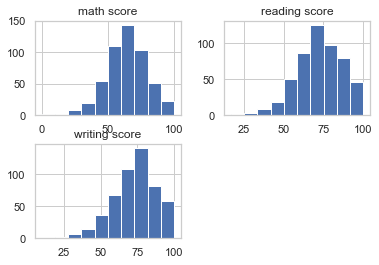

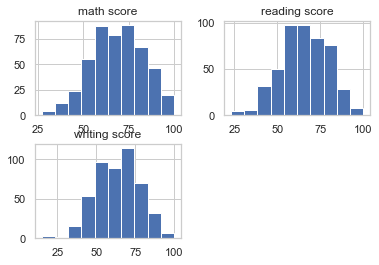

race/ethnicity


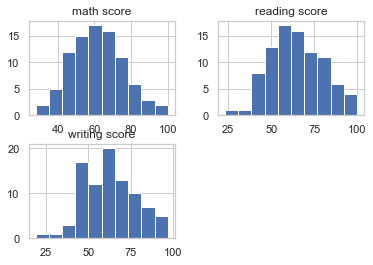

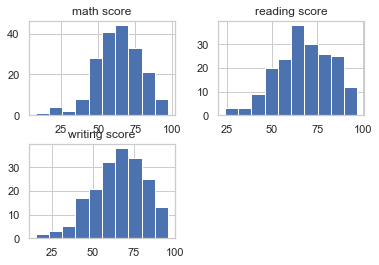

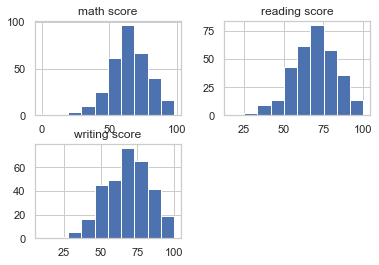

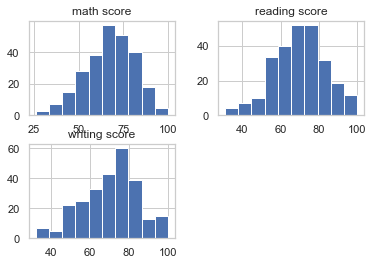

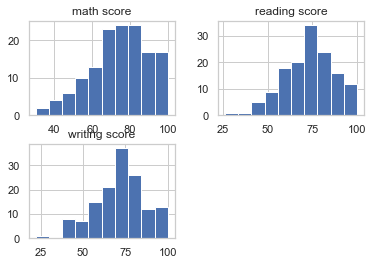

parental level of education


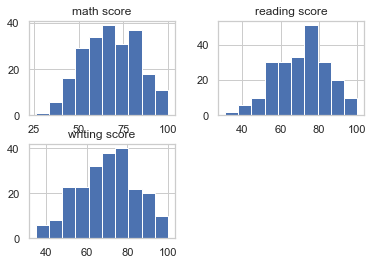

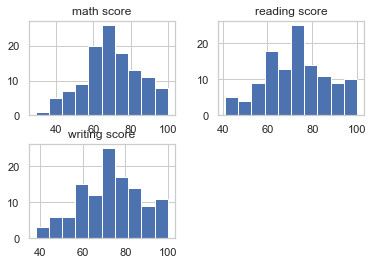

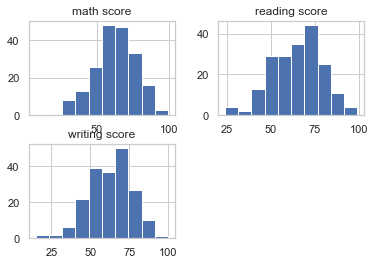

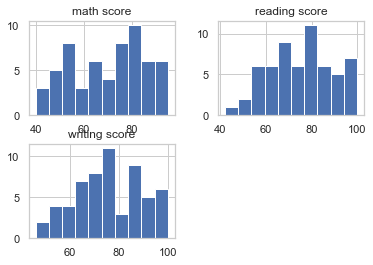

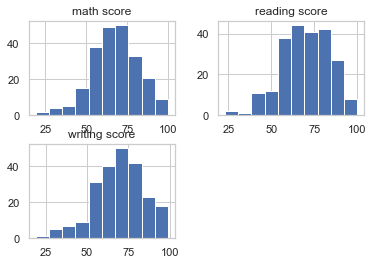

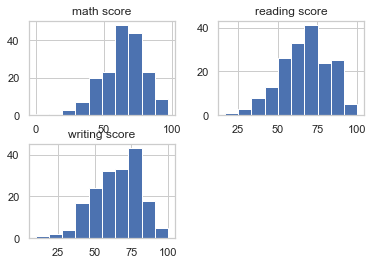

<IPython.core.display.Javascript object>

In [25]:
# gender x math score
for col in target_cols:
    print(col)
    taregts_and_scores.groupby(by=col).hist(label=col)
    plt.legend(col)
    plt.show()

# sns.distplot(students[students["gender"] == "female"]["math score"], label="female")
# plt.legend()

# sns.distplot(students[students["gender"] == "male"]["math score"], label="male")
# plt.legend()

In [26]:
lunch_and_scores = students[["lunch", "math score", "reading score", "writing score"]]

<IPython.core.display.Javascript object>

In [29]:
lunch_and_scores.groupby("lunch").mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


<IPython.core.display.Javascript object>

In [30]:
prep_and_scores = students[
    ["test preparation course", "math score", "reading score", "writing score"]
]

<IPython.core.display.Javascript object>

In [31]:
prep_and_scores.groupby("test preparation course").mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


<IPython.core.display.Javascript object>

In [32]:
# short of doing formal testing for normality, controlling for p hacking,
# and the rest of analysis rigor, I am satisfied at mean differences
# given the shape of the data

<IPython.core.display.Javascript object>